In [68]:
script = False
cluster = False

import numpy as np
import pandas as pd

import os
from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

if(script):
    from tqdm import tqdm
else: 
    from tqdm.notebook import tqdm

from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [69]:
filename = 'other.fits'
hdu_list = fits.open(filename)
images_sim = hdu_list[1].data
images_lens = hdu_list[2].data
data = pd.DataFrame(hdu_list[3].data)
data = data.drop('TILENAME', axis=1)
hdu_list.close()

In [70]:
images_sim.shape
images_lens.shape

(30, 3, 45, 45)

In [71]:
#Makes 3 plots per image: source simulation, lens cutout, complete simulation
def make_graphs(name, sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g):
    loc = plticker.MultipleLocator(base=3.75)
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)

    rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
    ax1.set_title('Source(s)')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    original = ax1.imshow(rgb, aspect='equal')

    rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
    ax2.set_title('Lens')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    cutout = ax2.imshow(rgb, aspect='equal')
            
    rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
    ax3.set_title('Complete Simulation')
    ax3.xaxis.set_ticklabels([])
    ax3.yaxis.set_ticklabels([])
    projection = ax3.imshow(rgb, aspect='equal')
   
    sub_path = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/'
    #plt.savefig(sub_path + 'Data/Sim_complete/Image' + name + '.png', bbox_inches='tight')
    plt.show()

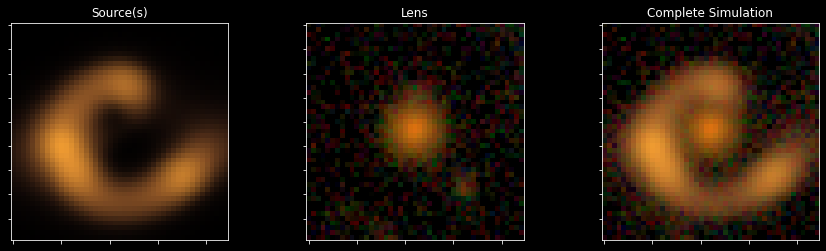

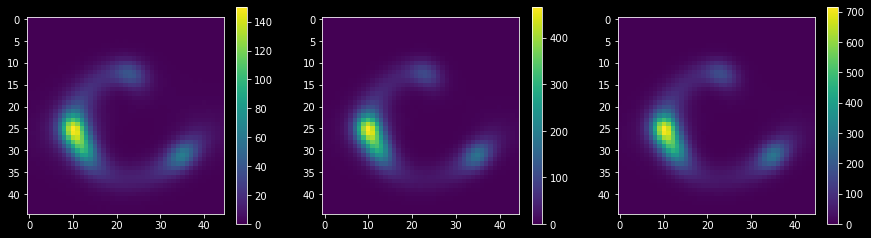

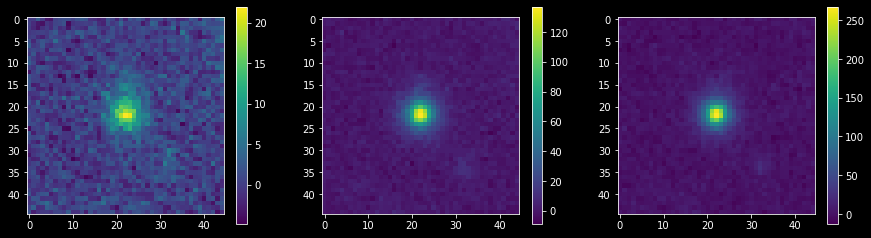

In [72]:
#images_sim
ind = 12
test_g, test_r, test_i = np.zeros((45,45)), np.zeros((45,45)), np.zeros((45,45))
img_g, img_r, img_i = images_sim[ind][0], images_sim[ind][1], images_sim[ind][2]
lens_g, lens_r, lens_i = images_lens[ind][0], images_lens[ind][1], images_lens[ind][2]

make_graphs('name', img_i, img_r, img_g, lens_i, lens_r, lens_g)

# Sim
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)
img1 = ax1.imshow(img_g)
plt.colorbar(img1, ax=ax1)             
img2 = ax2.imshow(img_r)
plt.colorbar(img2, ax=ax2)
img3 = ax3.imshow(img_i)
plt.colorbar(img3, ax=ax3)
plt.show()

# lens
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)
img1 = ax1.imshow(lens_g)
plt.colorbar(img1, ax=ax1)             
img2 = ax2.imshow(lens_r)
plt.colorbar(img2, ax=ax2)
img3 = ax3.imshow(lens_i)
plt.colorbar(img3, ax=ax3)
plt.show()

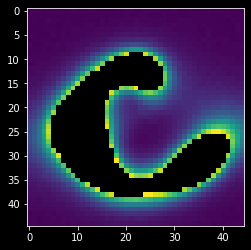

In [73]:
test = np.ma.masked_greater(img_g, 10)
fig, ax1 = plt.subplots(figsize=(15, 4), ncols=1)
img1 = ax1.imshow(test)

(45, 45)


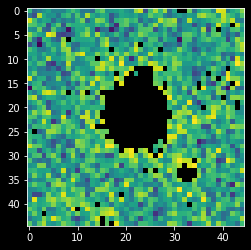

In [76]:
test = np.ma.masked_greater(lens_i, 10)
print(test.shape)
fig, ax1 = plt.subplots(figsize=(15, 4), ncols=1)
img1 = ax1.imshow(test)

In [78]:
new_t = np.zeros((45,45))
new_t[test]

IndexError: arrays used as indices must be of integer (or boolean) type